# Distance Based Tests Point Patterns

**Goal:** Apply Ripley family of distance statistics   to an empirical point pattern.

You will be analyzing a point pattern of fires from a [CAL Fire](https://www.fire.ca.gov/incidents) database.

In [1]:
import geopandas as gpd
import numpy
import matplotlib.pyplot as plt

In [2]:
fires = gpd.read_parquet("sd_fires.parquet")

<Axes: >

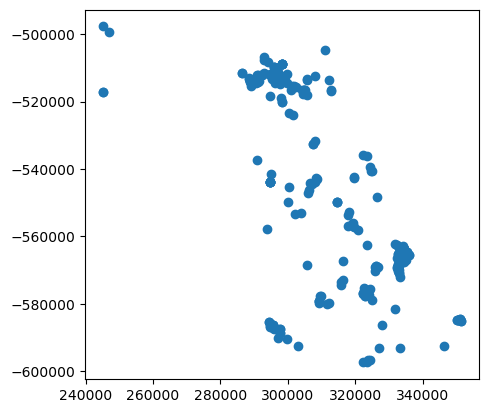

In [3]:
fires.plot()

Setup complete. Libraries imported.

--- Generating Gabriel Graph (GG) ---


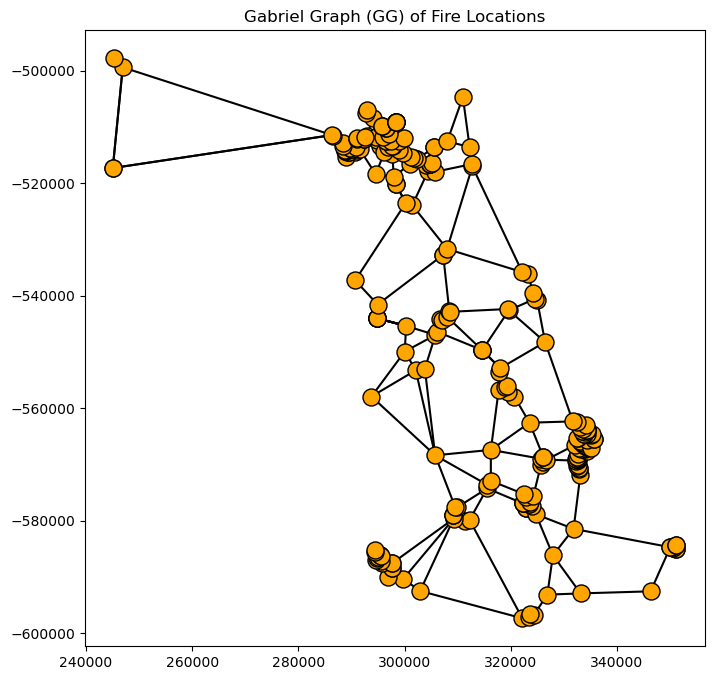

In [4]:
# ==============================================================================
# Part 0: Setup
# ==============================================================================
# Core spatial analysis libraries from PySAL
import libpysal.weights as weights
from libpysal import examples
from libpysal import graph
from pointpats import PointPattern
from pointpats.process import PoissonPointProcess

# For generating point patterns
import numpy as np

# For plotting
import matplotlib.pyplot as plt

print("Setup complete. Libraries imported.")




# --- Proximity Graphs ---


# --- Gabriel Graph (GG) ---
print("\n--- Generating Gabriel Graph (GG) ---")
# Build the graph using the libpysal.graph module
gg = graph.Graph.build_triangulation(
    fires, method='gabriel', coplanar='clique'
)
fig, ax = plt.subplots(figsize=(8, 8))
gg.plot(fires, ax=ax, 
                   edge_kws=dict(color='k', linestyle='-'), 
                   node_kws=dict(color='orange', edgecolor='k', s=150))
ax.set_title("Gabriel Graph (GG) of Fire Locations")
plt.show()

In [5]:
import pointpats


In [6]:
pointpats.g_test?

Signature:
pointpats.g_test(
    coordinates,
    support=None,
    distances=None,
    metric='euclidean',
    hull=None,
    edge_correction=None,
    keep_simulations=False,
    n_simulations=9999,
)
Docstring:
Ripley's G function

The G function is computed from the cumulative density function of the nearest neighbor
distances between points in the pattern.

When the G function is below the simulated values, it suggests dispersion.

Parameters
----------
coordinates : geopandas object | numpy.ndarray, (n,2)
    input coordinates to function
support : tuple of length 1, 2, or 3, int, or numpy.ndarray
    tuple, encoding (stop,), (start, stop), or (start, stop, num)
    int, encoding number of equally-spaced intervals
    numpy.ndarray, used directly within numpy.histogram
distances: numpy.ndarray, (n, p) or (p,)
    distances from every point in a random point set of size p
    to some point in `coordinates`
metric: str or callable
    distance metric to use when building search tre

In [7]:
coordinates = fires.get_coordinates()

In [8]:
coordinates.shape

(246, 2)

In [9]:
g_test = pointpats.g_test(coordinates, keep_simulations=True)

In [10]:
dir(g_test)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_asdict',
 '_field_defaults',
 '_fields',
 '_make',
 '_replace',
 'count',
 'index',
 'pvalue',
 'simulations',
 'statistic',
 'support']

In [11]:
g_test.pvalue

array([0.000e+00, 1.000e-04, 1.000e-04, 1.000e-04, 1.000e-04, 1.000e-04,
       1.000e-04, 1.000e-04, 1.000e-04, 1.000e-04, 1.000e-04, 1.000e-04,
       3.000e-04, 2.680e-02, 2.678e-01, 4.733e-01, 1.381e-01, 2.154e-01,
       4.600e-02, 0.000e+00])

In [12]:
len(g_test.pvalue)

20

In [13]:
g_test.support

array([   0.        ,  522.43529507, 1044.87059013, 1567.3058852 ,
       2089.74118027, 2612.17647534, 3134.6117704 , 3657.04706547,
       4179.48236054, 4701.9176556 , 5224.35295067, 5746.78824574,
       6269.22354081, 6791.65883587, 7314.09413094, 7836.52942601,
       8358.96472107, 8881.40001614, 9403.83531121, 9926.27060627])

In [14]:
def plot_ripley(test, gdf, name='G'):
    f, ax = plt.subplots(
        1, 2, figsize=(9, 3), gridspec_kw=dict(width_ratios=(6, 3))
        )
    # plot all the simulations with very fine lines
    ax[0].plot(
        test.support, test.simulations.T, color="k", alpha=0.01
        )
    # and show the average of simulations
    ax[0].plot(
        test.support,
        numpy.median(test.simulations, axis=0),
        color="cyan",
        label="median simulation",
    )
    
    
    # and the observed pattern's G function
    ax[0].plot(
        test.support, test.statistic, label="observed", color="red"
    )
    
    # clean up labels and axes
    ax[0].set_xlabel("distance")
    ax[0].set_ylabel("% of nearest neighbor\ndistances shorter")
    ax[0].legend()
    ax[0].set_xlim(0, test.support.max())
    ax[0].set_title(f"Ripley's {name} function")
    
    # plot the pattern itself on the next frame
    gdf.plot(ax=ax[1])
    
    # and clean up labels and axes there, too
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    ax[1].set_xticklabels([])
    ax[1].set_yticklabels([])
    ax[1].set_title("Pattern")
    f.tight_layout()
    plt.show()
    

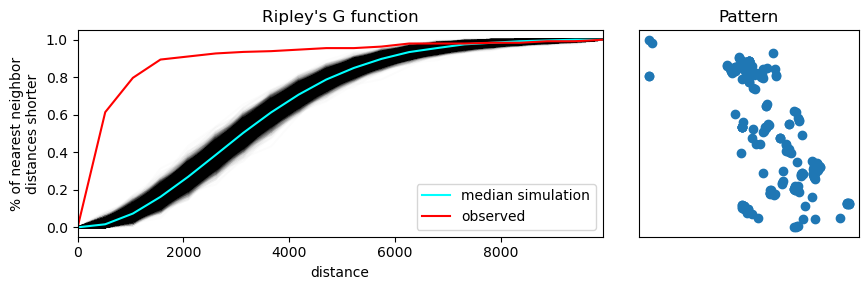

In [15]:
plot_ripley(g_test, fires)

In [16]:
k_test = pointpats.k_test(coordinates, keep_simulations=True)

In [17]:
k_test.pvalue

array([0.    , 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001])

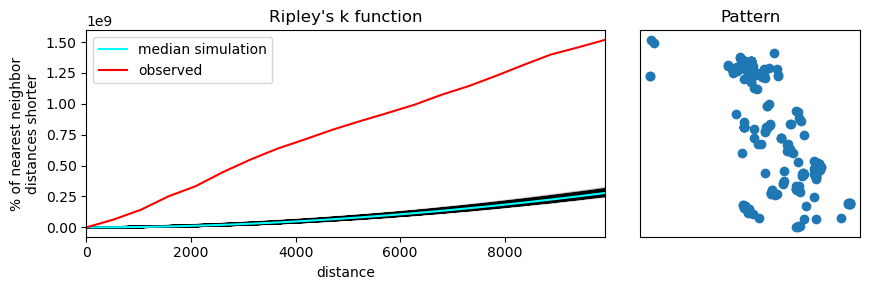

In [18]:
plot_ripley(k_test, fires, name='k')